<a href="https://colab.research.google.com/github/lucamaral/pos_aprendizado_supervisionado/blob/master/Exercicio2LucasAmaral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1631]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer

In [1632]:
df_churn = pd.read_csv('telco_customer_churn.csv', sep = ',', decimal = '.')

## Análise das variáveis

In [1633]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1634]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1635]:
def densityChart (col: str): 
  print('Verificando variavel ' + col)
  df_churn[col].plot.density()
def boxChart (col: str):
  print('Verificando variavel ' + col)
  df_churn[col].plot.box()
def barChart (col: str):
  print('Verificando variavel ' + col)
  df_churn[col].plot.bar()
def pieChart (col: str): 
  print('Verificando variavel ' + col)
  df_churn[col].value_counts().plot.pie()
def crosstab (col: str):
  print('Gerando cruzamento entre variável ' + col + ' e variável Churn')
  ct = pd.crosstab(df_churn.Churn, df_churn[col])
  print(ct)
  checkDependency(ct)
def checkDependency (ct): 
  stats, p_value, dof, _ = chi2_contingency(ct)
  alpha = 0.05
  if p_value < alpha:
      print('Rejeita o hipótese nula. As variáveis são dependentes')
  else:
      print('Aceita o hipótese nula. As variáveis são independentes.')

### Gender

Verificando variavel gender


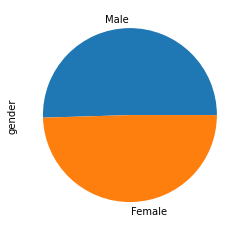

In [1636]:
pieChart('gender')

# Sem problemas com os valores e balanceado

In [1637]:
crosstab('gender')

Gerando cruzamento entre variável gender e variável Churn
gender  Female  Male
Churn               
No        2549  2625
Yes        939   930
Aceita o hipótese nula. As variáveis são independentes.


### SeniorCitizen

Verificando variavel SeniorCitizen


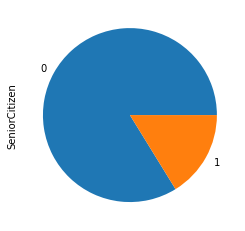

In [1638]:
pieChart('SeniorCitizen')
# Maioria 0, sem problemas com os valores.

In [1639]:
crosstab('SeniorCitizen')

Gerando cruzamento entre variável SeniorCitizen e variável Churn
SeniorCitizen     0    1
Churn                   
No             4508  666
Yes            1393  476
Rejeita o hipótese nula. As variáveis são dependentes


### Partner

Verificando variavel Partner


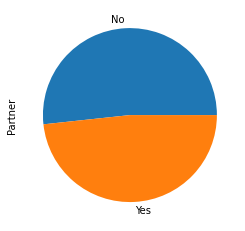

In [1640]:
pieChart('Partner')
# Sem problemas nos valores e balanceado

In [1641]:
crosstab('Partner')

Gerando cruzamento entre variável Partner e variável Churn
Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669
Rejeita o hipótese nula. As variáveis são dependentes


### Dependents

Verificando variavel Dependents


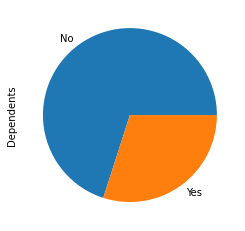

In [1642]:
pieChart('Dependents')
# Maioria No, sem problema nos valores

In [1643]:
crosstab('Dependents')

Gerando cruzamento entre variável Dependents e variável Churn
Dependents    No   Yes
Churn                 
No          3390  1784
Yes         1543   326
Rejeita o hipótese nula. As variáveis são dependentes


### Tenure

Verificando variavel tenure


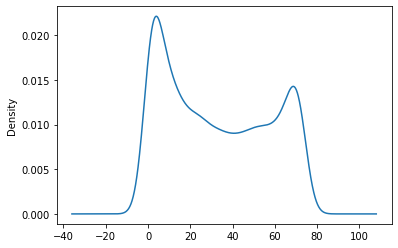

In [1644]:
densityChart('tenure')
# Não segue uma distribuição normal

Verificando variavel tenure


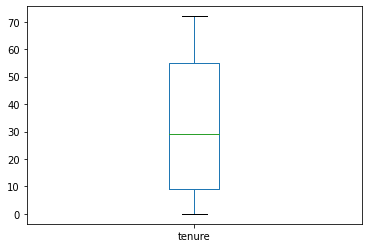

In [1645]:
boxChart('tenure')
# Segundo o boxChart, não existem outliers

In [1646]:
crosstab('tenure')

Gerando cruzamento entre variável tenure e variável Churn
tenure  0    1    2    3   4   5   6   7   ...  65  66  67  68  69   70   71   72
Churn                                      ...                                   
No      11  233  115  106  93  69  70  80  ...  67  76  88  91  87  108  164  356
Yes      0  380  123   94  83  64  40  51  ...   9  13  10   9   8   11    6    6

[2 rows x 73 columns]
Rejeita o hipótese nula. As variáveis são dependentes


### PhoneService

Verificando variavel PhoneService


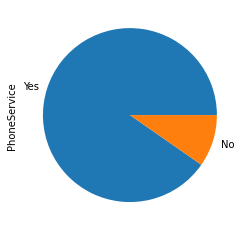

In [1647]:
pieChart('PhoneService')
# Maioria Yes, sem problemas com os valores

In [1648]:
crosstab('PhoneService')

Gerando cruzamento entre variável PhoneService e variável Churn
PhoneService   No   Yes
Churn                  
No            512  4662
Yes           170  1699
Aceita o hipótese nula. As variáveis são independentes.


### MultipleLines

Verificando variavel MultipleLines


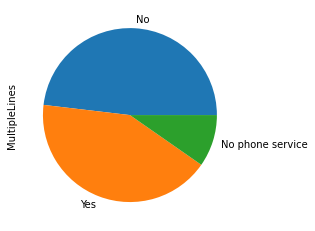

In [1649]:
pieChart('MultipleLines')
# Balanceado, mas o valor No phone service pode ser alterado para No

In [1650]:
crosstab('MultipleLines')

Gerando cruzamento entre variável MultipleLines e variável Churn
MultipleLines    No  No phone service   Yes
Churn                                      
No             2541               512  2121
Yes             849               170   850
Rejeita o hipótese nula. As variáveis são dependentes


### InternetService

Verificando variavel InternetService


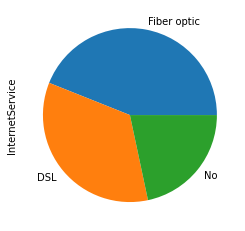

In [1651]:
pieChart('InternetService')
# Converter Fiber optic e DSL para Yes e criar uma nova variável para o tipo

In [1652]:
crosstab('InternetService')

Gerando cruzamento entre variável InternetService e variável Churn
InternetService   DSL  Fiber optic    No
Churn                                   
No               1962         1799  1413
Yes               459         1297   113
Rejeita o hipótese nula. As variáveis são dependentes


### OnlineSecurity

Verificando variavel OnlineSecurity


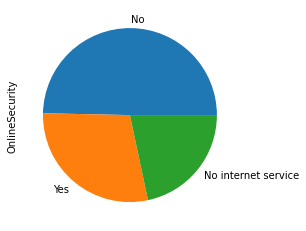

In [1653]:
pieChart("OnlineSecurity")
# Alterar valor No internet service para No

In [1654]:
crosstab('OnlineSecurity')

Gerando cruzamento entre variável OnlineSecurity e variável Churn
OnlineSecurity    No  No internet service   Yes
Churn                                          
No              2037                 1413  1724
Yes             1461                  113   295
Rejeita o hipótese nula. As variáveis são dependentes


### OnlineBackup

Verificando variavel OnlineBackup


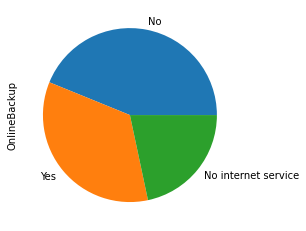

In [1655]:
pieChart('OnlineBackup')
# Alterar valor No internet service para No

In [1656]:
crosstab('OnlineBackup')

Gerando cruzamento entre variável OnlineBackup e variável Churn
OnlineBackup    No  No internet service   Yes
Churn                                        
No            1855                 1413  1906
Yes           1233                  113   523
Rejeita o hipótese nula. As variáveis são dependentes


### DeviceProtection

Verificando variavel DeviceProtection


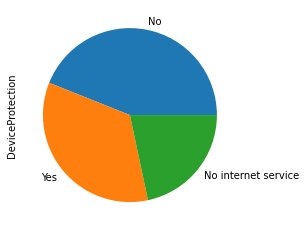

In [1657]:
pieChart("DeviceProtection")
# Alterar valor no internet service por No

In [1658]:
crosstab('DeviceProtection')

Gerando cruzamento entre variável DeviceProtection e variável Churn
DeviceProtection    No  No internet service   Yes
Churn                                            
No                1884                 1413  1877
Yes               1211                  113   545
Rejeita o hipótese nula. As variáveis são dependentes


### TechSupport

Verificando variavel TechSupport


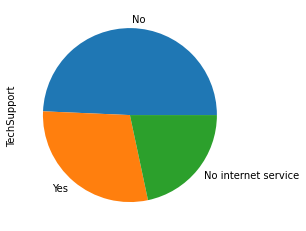

In [1659]:
pieChart("TechSupport")
# Alterar valor no internet service por No

In [1660]:
crosstab("TechSupport")

Gerando cruzamento entre variável TechSupport e variável Churn
TechSupport    No  No internet service   Yes
Churn                                       
No           2027                 1413  1734
Yes          1446                  113   310
Rejeita o hipótese nula. As variáveis são dependentes


### StreamingTV

Verificando variavel StreamingTV


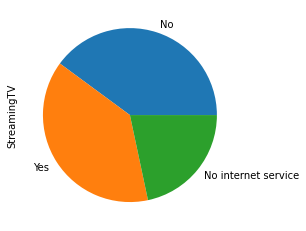

In [1661]:
pieChart("StreamingTV")
# Alterar valor no internet service por No

In [1662]:
crosstab("StreamingTV")

Gerando cruzamento entre variável StreamingTV e variável Churn
StreamingTV    No  No internet service   Yes
Churn                                       
No           1868                 1413  1893
Yes           942                  113   814
Rejeita o hipótese nula. As variáveis são dependentes


### StreamingMovies

Verificando variavel StreamingMovies


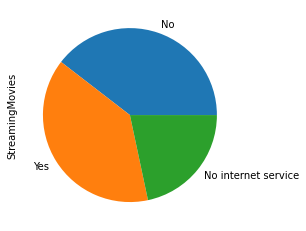

In [1663]:
pieChart("StreamingMovies")
# Alterar valor no internet service por No

In [1664]:
crosstab("StreamingMovies")

Gerando cruzamento entre variável StreamingMovies e variável Churn
StreamingMovies    No  No internet service   Yes
Churn                                           
No               1847                 1413  1914
Yes               938                  113   818
Rejeita o hipótese nula. As variáveis são dependentes


### Contract

Verificando variavel Contract


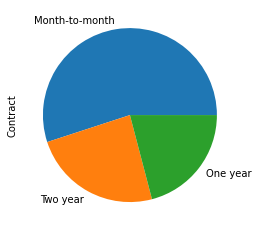

In [1665]:
pieChart('Contract')

In [1666]:
crosstab("Contract")

Gerando cruzamento entre variável Contract e variável Churn
Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1307      1647
Yes                 1655       166        48
Rejeita o hipótese nula. As variáveis são dependentes


### PaperlessBilling

Verificando variavel PaperlessBilling


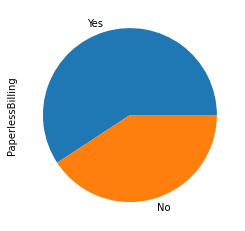

In [1667]:
pieChart("PaperlessBilling")

In [1668]:
crosstab("PaperlessBilling")

Gerando cruzamento entre variável PaperlessBilling e variável Churn
PaperlessBilling    No   Yes
Churn                       
No                2403  2771
Yes                469  1400
Rejeita o hipótese nula. As variáveis são dependentes


### PaymentMethod

Verificando variavel PaymentMethod


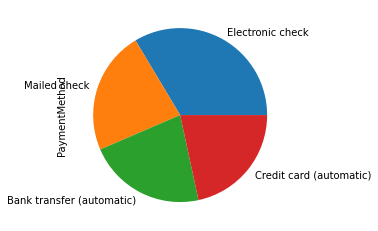

In [1669]:
pieChart('PaymentMethod')
# Adicionar variavel "Automatic_Payment"

In [1670]:
crosstab('PaymentMethod')

Gerando cruzamento entre variável PaymentMethod e variável Churn
PaymentMethod  Bank transfer (automatic)  ...  Mailed check
Churn                                     ...              
No                                  1286  ...          1304
Yes                                  258  ...           308

[2 rows x 4 columns]
Rejeita o hipótese nula. As variáveis são dependentes


### MonthlyCharges

Verificando variavel MonthlyCharges


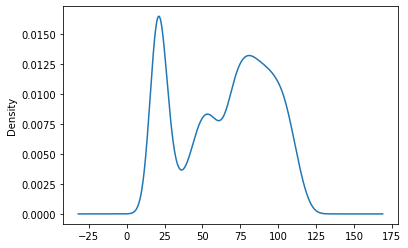

In [1671]:
densityChart('MonthlyCharges')

# Não segue uma distribuição normal

In [1672]:
crosstab("MonthlyCharges")

Gerando cruzamento entre variável MonthlyCharges e variável Churn
MonthlyCharges  18.25   18.40   18.55   18.70   ...  118.35  118.60  118.65  118.75
Churn                                           ...                                
No                   1       1       1       2  ...       0       2       1       1
Yes                  0       0       0       0  ...       1       0       0       0

[2 rows x 1585 columns]
Rejeita o hipótese nula. As variáveis são dependentes


Verificando variavel MonthlyCharges


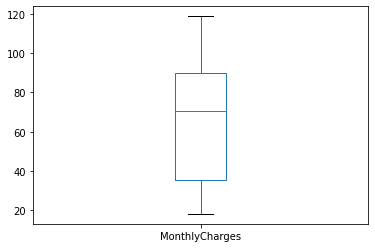

In [1673]:
boxChart("MonthlyCharges")

# Sem outliers

### TotalCharges

Verificando variavel TotalCharges


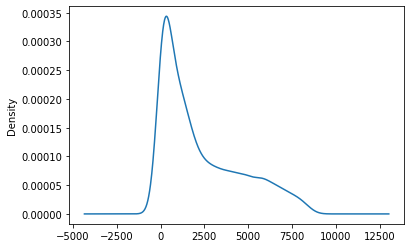

In [1674]:
df_churn.TotalCharges = df_churn.TotalCharges.replace(" ", 0).astype(float)
densityChart("TotalCharges")
# Não segue uma distribuição normal

In [1675]:
crosstab("TotalCharges")

Gerando cruzamento entre variável TotalCharges e variável Churn
TotalCharges  0.00     18.80    18.85    ...  8670.10  8672.45  8684.80
Churn                                    ...                           
No                 11        1        1  ...        1        1        0
Yes                 0        0        1  ...        0        0        1

[2 rows x 6531 columns]
Aceita o hipótese nula. As variáveis são independentes.


Verificando variavel TotalCharges


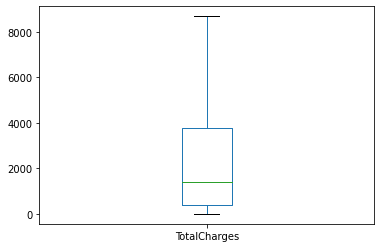

In [1676]:
boxChart("TotalCharges")

# Sem outliers

## Ajustes na base e novas colunas

In [1677]:
# Criando nova variavel, indicando o tipo de serviço de internet
df_churn = df_churn.assign(InternetServiceType = df_churn.InternetService.apply(lambda x: x))
# Convertendo variavel InternetService para Yes/No
df_churn.InternetService = df_churn.InternetService.apply(lambda x: "No" if x == 'No' else "Yes")

In [1678]:
# Adicionando variavel Payment_Automatic
df_churn = df_churn.assign(Payment_Automatic = df_churn.PaymentMethod.apply(lambda x: 'Yes' if 'automatic' in x else 'No'))

In [1679]:
# Alterando Churn para 1/0
df_churn.Churn = df_churn.Churn.apply(lambda x: 1 if x == 'Yes' else 0)

In [1680]:
# Alterando SeniorCitizen para ser Yes/No

df_churn.SeniorCitizen = df_churn.SeniorCitizen.apply(lambda x: "Yes" if x == 1 else "No")

# Normalizando variaveis categoricas para Yes/No 

cat_cols = ['Payment_Automatic', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'InternetService']

for col in cat_cols:
  df_churn[col] = df_churn[col].apply(lambda x: "Yes" if x == 'Yes' else "No")

# Adicionar variavel que nao são Yes/No nas cat_cols após limpeza do Yes/No

cat_cols.append("Contract")
cat_cols.append("PaymentMethod")
cat_cols.append("gender")
cat_cols.append("InternetServiceType")

In [1681]:
# Gerando variaveis dummies para usar na correlação
df_dummies = pd.get_dummies(data = df_churn, columns = cat_cols)

In [1682]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   gender               7043 non-null   object 
 2   SeniorCitizen        7043 non-null   object 
 3   Partner              7043 non-null   object 
 4   Dependents           7043 non-null   object 
 5   tenure               7043 non-null   int64  
 6   PhoneService         7043 non-null   object 
 7   MultipleLines        7043 non-null   object 
 8   InternetService      7043 non-null   object 
 9   OnlineSecurity       7043 non-null   object 
 10  OnlineBackup         7043 non-null   object 
 11  DeviceProtection     7043 non-null   object 
 12  TechSupport          7043 non-null   object 
 13  StreamingTV          7043 non-null   object 
 14  StreamingMovies      7043 non-null   object 
 15  Contract             7043 non-null   o

## Discretização

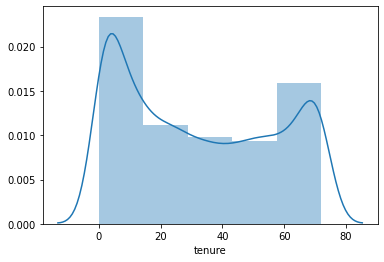

In [1683]:
# Verificando distribuição do tenure
sns.distplot(df_churn.tenure, bins=5, hist=True,label='tenure')

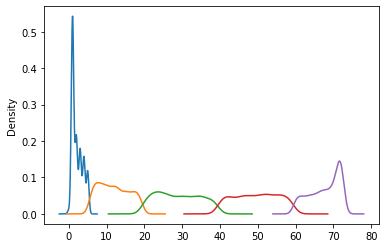

In [1684]:
# Discretização do tenure
bins = 5
discretizer = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile')
df_churn = df_churn.assign(tenure_discretized = discretizer.fit_transform(df_churn.tenure.values.reshape(-1, 1)))
df_dummies = df_dummies.assign(tenure_discretized = discretizer.fit_transform(df_dummies.tenure.values.reshape(-1, 1)))
[ df_churn[df_churn.tenure_discretized == i].tenure.plot.density() for i in range(bins) ]

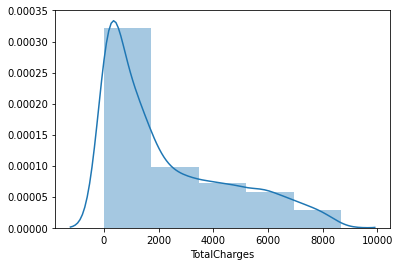

In [1685]:
# Verificando distribuição do TotalCharges
sns.distplot(df_churn.TotalCharges, bins=5, hist=True,label='TotalCharges')

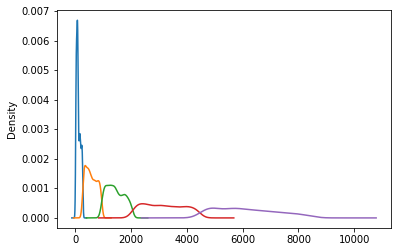

In [1686]:
# Discretização do TotalCharges
bins = 5
discretizer = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile')
df_churn = df_churn.assign(TotalCharges_Discretized = discretizer.fit_transform(df_churn.TotalCharges.values.reshape(-1, 1)))
df_dummies = df_dummies.assign(TotalCharges_Discretized = discretizer.fit_transform(df_dummies.TotalCharges.values.reshape(-1, 1)))
[ df_churn[df_churn.TotalCharges_Discretized == i].TotalCharges.plot.density() for i in range(bins) ]

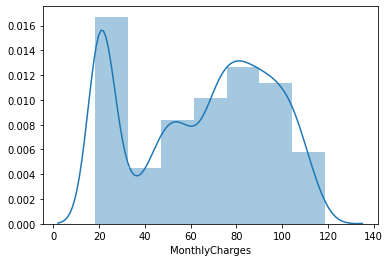

In [1687]:
# Verificando distribuição do MonthlyCharges
sns.distplot(df_churn.MonthlyCharges, bins=7, hist=True,label='MonthlyCharges')

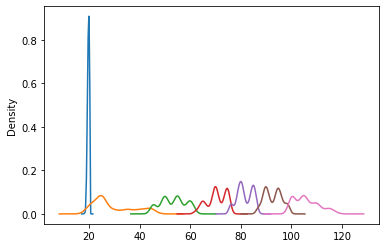

In [1688]:
# Discretização do MonthlyCharges
bins = 7
discretizer = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile')
df_churn = df_churn.assign(MonthlyCharges_Discretized = discretizer.fit_transform(df_churn.MonthlyCharges.values.reshape(-1, 1)))
df_dummies = df_dummies.assign(MonthlyCharges_Discretized = discretizer.fit_transform(df_dummies.MonthlyCharges.values.reshape(-1, 1)))
[ df_churn[df_churn.MonthlyCharges_Discretized == i].MonthlyCharges.plot.density() for i in range(bins) ]

In [1689]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceType,Payment_Automatic,tenure_discretized,TotalCharges_Discretized,MonthlyCharges_Discretized
0,7590-VHVEG,Female,No,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,DSL,No,0.0,0.0,1.0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,DSL,No,2.0,2.0,2.0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,DSL,No,0.0,0.0,2.0
3,7795-CFOCW,Male,No,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,DSL,Yes,3.0,2.0,1.0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Fiber optic,No,0.0,0.0,3.0


## Verificando correlações

In [1690]:
corr = df_dummies.corr()
Churn_col = corr[['Churn']]
Churn_col.Churn.abs().sort_values()

# Variáveis com mais de 15% de correlação serão escolhidos para construir as features do modelo

gender_Male                                0.008612
gender_Female                              0.008612
PhoneService_No                            0.011942
PhoneService_Yes                           0.011942
MultipleLines_Yes                          0.040102
MultipleLines_No                           0.040102
StreamingMovies_Yes                        0.061382
StreamingMovies_No                         0.061382
StreamingTV_No                             0.063228
StreamingTV_Yes                            0.063228
DeviceProtection_Yes                       0.066160
DeviceProtection_No                        0.066160
OnlineBackup_Yes                           0.082255
OnlineBackup_No                            0.082255
PaymentMethod_Mailed check                 0.091683
PaymentMethod_Bank transfer (automatic)    0.117937
InternetServiceType_DSL                    0.124214
PaymentMethod_Credit card (automatic)      0.134302
Partner_Yes                                0.150448
Partner_No  

## Criando modelo

In [1691]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

def build_models(alg: str):
    model = None
    if alg == 'logistic_regression':
        model = GridSearchCV(
            LogisticRegression(n_jobs=-1),
            param_grid={
                'C': [0.0001, 0.001, 0.01, 0.1, 1],
                'class_weight': [None, 'balanced']
            },
            scoring='recall',
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'decision_tree':
        model = GridSearchCV(
            DecisionTreeClassifier(),
            param_grid={
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 4, 8],
                'min_samples_split': [2, 4, 8],
                'class_weight': [None, 'balanced']
            },
            scoring='recall',
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'random_forest':
        model = GridSearchCV(
            RandomForestClassifier(n_estimators=50, n_jobs=-1),
            param_grid={
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 4, 8],
                'min_samples_split': [2, 4, 8],
                'class_weight': [None, 'balanced']
            },
            scoring='recall',
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'knn':
        model = GridSearchCV(
            KNeighborsClassifier(n_jobs=-1),
            param_grid={
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
            }, 
            scoring='recall',
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'svm':
        model = GridSearchCV(
            SVC(),
            param_grid={
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                'class_weight': [None, 'balanced'],
                'kernel': ['linear', 'poly']
            },
            scoring='f1',
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1
        )
    
    return model

In [1692]:
def build_features(df_train, df_test):
    cat_cols = ['Partner', 'SeniorCitizen', 'Dependents', 'TechSupport', 
                'OnlineSecurity', 'Contract', 'PaperlessBilling', 
                'Payment_Automatic', 'InternetServiceType', 'InternetService', 'PaymentMethod']

    ohe = OneHotEncoder(sparse=False)
    ohe_train = ohe.fit_transform(df_train[cat_cols])
    ohe_test = ohe.transform(df_test[cat_cols])

    mm = MinMaxScaler()
    mm_train = mm.fit_transform(df_train[['tenure_discretized', 'TotalCharges_Discretized', 'MonthlyCharges_Discretized']])
    mm_test = mm.transform(df_test[['tenure_discretized', 'TotalCharges_Discretized', 'MonthlyCharges_Discretized']])

    x_train = np.hstack([ohe_train, mm_train])
    x_test = np.hstack([ohe_test, mm_test])

    y_train = df_train.Churn.values
    y_test = df_test.Churn.values

    return x_train, y_train, x_test, y_test

In [1693]:
algs = ['logistic_regression', 'decision_tree', 'random_forest', 'knn', 'svm']
results_matrix = np.zeros(shape=(len(algs), 10, 4, 2)) # shape = (algoritmo, fold, métrica, dataset)
for alg_index, alg in enumerate(algs):
    cv = StratifiedKFold(10, shuffle=True)
    for fold, (train, test) in enumerate(cv.split(df_churn, df_churn.Churn.values)):
        df_train = df_churn.iloc[train]
        df_test = df_churn.iloc[test]

        x_train, y_train, x_test, y_test = build_features(df_train, df_test)

        model = build_models(alg)
        model.fit(x_train, y_train)

        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        # acurácia, treino e teste
        results_matrix[alg_index, fold, 0, 0] = accuracy_score(y_train, y_pred_train)
        results_matrix[alg_index, fold, 0, 1] = accuracy_score(y_test, y_pred_test)

        p_train, r_train, f_train, _ = precision_recall_fscore_support(y_train, y_pred_train, average='binary')
        p_test, r_test, f_test, _ = precision_recall_fscore_support(y_test, y_pred_test, average='binary')

        # precisão, treino e teste
        results_matrix[alg_index, fold, 1, 0] = p_train
        results_matrix[alg_index, fold, 1, 1] = p_test

        # cobertura, treino e teste
        results_matrix[alg_index, fold, 2, 0] = r_train
        results_matrix[alg_index, fold, 2, 1] = r_test

        # fscore, treino e teste
        results_matrix[alg_index, fold, 3, 0] = f_train
        results_matrix[alg_index, fold, 3, 1] = f_test
    
    print('-' * 50)
    print(alg)
    print('-' * 50)
    print('Treino - Acurácia', results_matrix[alg_index,:,0,0].mean())
    print('Treino - Precisão', results_matrix[alg_index,:,1,0].mean())
    print('Treino - Cobertura', results_matrix[alg_index,:,2,0].mean())
    print('Treino - Medida F', results_matrix[alg_index,:,3,0].mean())
    print('-' * 50)
    print('Teste - Acurácia', results_matrix[alg_index,:,0,1].mean())
    print('Teste - Precisão', results_matrix[alg_index,:,1,1].mean())
    print('Teste - Cobertura', results_matrix[alg_index,:,2,1].mean())
    print('Teste - Medida F', results_matrix[alg_index,:,3,1].mean())
    print()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


--------------------------------------------------
logistic_regression
--------------------------------------------------
Treino - Acurácia 0.7458311909161413
Treino - Precisão 0.5135684779555332
Treino - Cobertura 0.8002500701213717
Treino - Medida F 0.6256245862355948
--------------------------------------------------
Teste - Acurácia 0.7440022566086396
Teste - Precisão 0.5124393465773243
Teste - Cobertura 0.7945719050083377
Teste - Medida F 0.6226201972484944

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 453 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


--------------------------------------------------
decision_tree
--------------------------------------------------
Treino - Acurácia 0.6544086353587769
Treino - Precisão 0.4270977821984263
Treino - Cobertura 0.8855003133383214
Treino - Medida F 0.5762540704980438
--------------------------------------------------
Teste - Acurácia 0.6544088491295937
Teste - Precisão 0.42717869749480136
Teste - Cobertura 0.8855039963199356
Teste - Medida F 0.5763013946119171

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


--------------------------------------------------
random_forest
--------------------------------------------------
Treino - Acurácia 0.7113289502825302
Treino - Precisão 0.4749239458037173
Treino - Cobertura 0.8270019563332844
Treino - Medida F 0.603293402962316
--------------------------------------------------
Teste - Acurácia 0.7114815038684719
Teste - Precisão 0.475453161093793
Teste - Cobertura 0.823431660054051
Teste - Medida F 0.6025526592190646

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.9s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.9s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.2s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.0s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.2s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.9s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.1s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.1s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.9s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.1s finished


--------------------------------------------------
knn
--------------------------------------------------
Treino - Acurácia 0.8284029736526616
Treino - Precisão 0.7134152590151792
Treino - Cobertura 0.5881233118765469
Treino - Medida F 0.6443088642877456
--------------------------------------------------
Teste - Acurácia 0.7725400950999355
Teste - Precisão 0.5877059141801447
Teste - Cobertura 0.47565982404692086
Teste - Medida F 0.525618858410111

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.6min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.6min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.5min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.6min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.6min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.6min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.6min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.6min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.6min finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.5min finished


--------------------------------------------------
svm
--------------------------------------------------
Treino - Acurácia 0.7552968368488888
Treino - Precisão 0.5259055147728063
Treino - Cobertura 0.7872914993115037
Treino - Medida F 0.6304943876328467
--------------------------------------------------
Teste - Acurácia 0.7441449065119278
Teste - Precisão 0.5131393110638047
Teste - Cobertura 0.7667184175723076
Teste - Medida F 0.6139017398360342



In [1694]:
x_train, y_train, x_test, y_test = build_features(df_churn, df_churn)

# Utilizar regressão logistica, pois teve uma melhor medida f e a menor diferença do treino para o teste
model = build_models('logistic_regression')
model.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'class_weight': [None, 'balanced']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [1695]:
# visualizando os parâmetros do melhor modelo encontrado na validação cruzada
model.best_params_

{'C': 0.01, 'class_weight': 'balanced'}

## Matriz de confusão

In [1696]:
# Visualizando matriz de confusão

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cv = StratifiedKFold(10, shuffle=True)
ground_truth = list()
predicted = list()

for fold, (train, test) in enumerate(cv.split(df_churn, df_churn.Churn.values)):
    df_train = df_churn.iloc[train]
    df_test = df_churn.iloc[test]

    x_train, y_train, x_test, y_test = build_features(df_train, df_test)

    model = build_models('logistic_regression')
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)

    ground_truth.extend(y_test)
    predicted.extend(y_predict)

print(classification_report(ground_truth, predicted))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


              precision    recall  f1-score   support

           0       0.91      0.72      0.81      5174
           1       0.51      0.80      0.62      1869

    accuracy                           0.74      7043
   macro avg       0.71      0.76      0.71      7043
weighted avg       0.80      0.74      0.76      7043



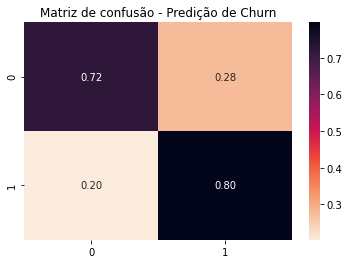

In [1697]:
# normalizando a matriz de confusão para visualizar o resultado da cobertura
cm = confusion_matrix(ground_truth, predicted)
cm = np.transpose(cm.T / cm.astype(np.float).sum(axis=1))

plt.title('Matriz de confusão - Predição de Churn')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='rocket_r')
plt.show()

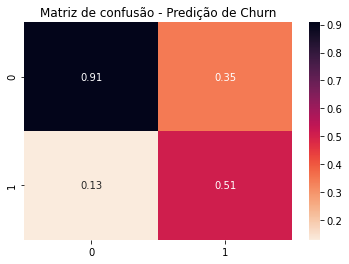

In [1698]:
# normalizando a matriz de confusão para visualizar o resultado da precisão
cm = confusion_matrix(ground_truth, predicted)
cm = np.transpose(cm.T / cm.astype(np.float).sum(axis=0))

plt.title('Matriz de confusão - Predição de Churn')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='rocket_r')
plt.show()

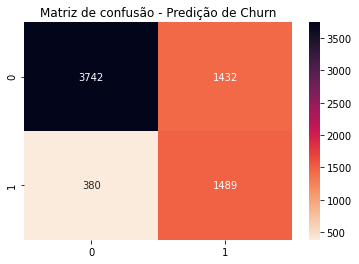

In [1699]:
# matriz de confusão sem normalização
cm = confusion_matrix(ground_truth, predicted)

plt.title('Matriz de confusão - Predição de Churn')
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
plt.show()